In [ ]:
# Homework 6 Template
# G. Besla & R. Li

In [125]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass
import os


In [275]:
def OrbitCOM(galaxy,start,end,n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          
    outputs: 
    """
    
    # compose the filename for output
    fileout = f"orbit_{galaxy}.txt"
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    Delta = .1
    volDec = 2
    
    
    # for M33 that is stripped more, use different values for VolDec
    if galaxy == 'M33':
        volDec = 4
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start,end,n)
    # it is always a good idea to also check if the input is eligible (not required)
    
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    # a for loop 
    for i,snap_id in enumerate(snap_ids):
        # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id)
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy) + ilbl + '.txt'
        #file = os.path.join("M33",filename)
        if galaxy == 'MW': 
            file = os.path.join("MW",filename)
        if galaxy == 'M31': 
            file = os.path.join("M31",filename)
        if galaxy == 'M33': 
            file = os.path.join("M33",filename)
        # Initialize an instance of CenterOfMass class, using disk particles
        COMp2 = CenterOfMass (file,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMpos = COMp2.COM_P(Delta,volDec)
        COMvel = COMp2.COM_V(COMpos[0],COMpos[1],COMpos[2])
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        #orbit[i] = (COMp2.time,COMpos[0].value,COMpos[1].value,COMpos[2].value,COMvel[0].value,COMvel[1].value,COMvel[2].value)
        orbit[i] = (COMp2.time.value,COMpos[0].value,COMpos[1].value,COMpos[2].value,COMvel[0].value,COMvel[1].value,COMvel[2].value)
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        
        # print snap_id to see the progress
        #print(snap_id)
        #print(orbit[i])
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    return fileout

In [277]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('MW',0,801,5)
OrbitCOM('M31',0,801,5)
OrbitCOM('M33',0,801,5)

'orbit_M33.txt'

In [289]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
dataMW = np.genfromtxt("orbit_MW.txt",dtype=None,names=True)
dataM31 = np.genfromtxt("orbit_M31.txt",dtype=None,names=True)
dataM33 = np.genfromtxt("orbit_M33.txt",dtype=None,names=True)
#print (dataMW[0][1])
#print(dataMW[1,1])
#print(dataMW)


In [291]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit 

def dvectors(file1,file2):
    dist = np.zeros(len(file1))
    vdist = np.zeros(len(file1))
    for i in range(len(file1)):
        #print (i)
        x = file1[i][1]
        y = file1[i][2]
        z = file1[i][3]
        vx = file1[i][4]
        vy = file1[i][5]
        vz = file1[i][6]
        dist[i] = np.sqrt(x**2+y**2+z**2)
        vdist[i] = np.sqrt(vx**2+vy**2+vz**2)
        #print(dist[i])
    return dist.tolist(),vdist.tolist()
        
        
        
    


In [293]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
MW31 = dvectors(dataMW,dataM31)
#print(MW31d[0])
# of M33 and M31
M3133 = dvectors(dataM31,dataM33)

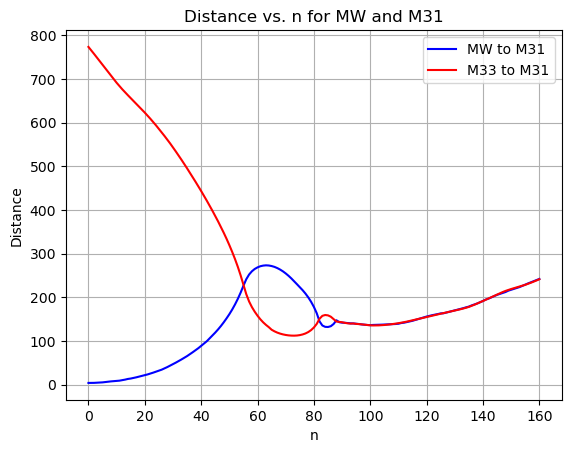

In [295]:
# Plot the Orbit of the galaxies 
#################################

distances1 = MW31[0]
distances2 = M3133[0]
plt.plot(distances1, linestyle='-', color='blue', label = 'MW to M31')
plt.plot(distances2, linestyle='-', color='red', label = 'M33 to M31')
# Labeling
plt.xlabel("n")
plt.ylabel("Distance")
plt.title("Distance vs. n for MW and M31")
plt.grid(True)
plt.legend()
    
plt.show()

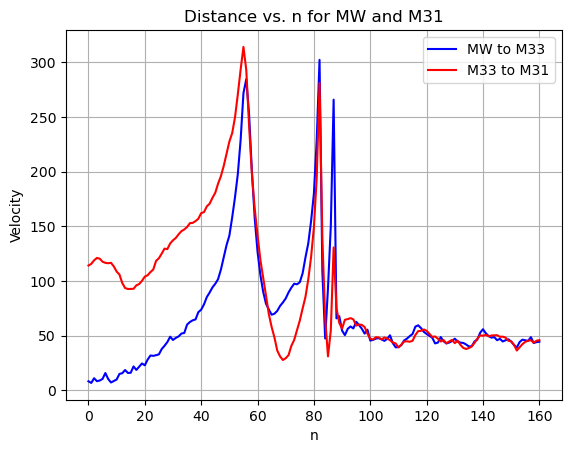

In [299]:
# Plot the orbital velocities of the galaxies 
#################################
velocities1 = MW31[1]
velocities2 = M3133[1]
plt.plot(velocities1, linestyle='-', color='blue', label = 'MW to M33')
plt.plot(velocities2, linestyle='-', color='red', label = 'M33 to M31')
# Labeling
plt.xlabel("n")
plt.ylabel("Velocity")
plt.title("Distance vs. n for MW and M31")
plt.grid(True)
plt.legend()
plt.show()

In [35]:
h = np.zeros([3,4])
print (h)
print (len(h))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
3


In [39]:
h[0] = (1,2,3,4)
h[1] = (5,6,7,8)
h[2] = (9,10,11,12)
print (h)



[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [47]:
print (h[1,1])

6.0


In [183]:
for i in len(h):
     print(h[i],'d')

TypeError: 'int' object is not iterable

In [187]:
print(range(len(h)))

range(0, 3)
